# Duane-Hunt
Consider using the Duane-Hunt limit as the beam energy when quantifying a set of K412 spectra.  The Duane-Hunt limit is the energy at which the continuum signal drops to zero.

In [1]:
using NeXLSpectrum
using NeXLMatrixCorrection
using Statistics
using DataFrames
using Gadfly
path = joinpath(@__DIR__,"..","test")

al2o3 = sum(findsimilar(loadspectrum.(joinpath(path,"Multi-keV", "20 keV", "IIIE Al2O3[$i][4].msa") for i in 0:4)))
sio2 = sum(findsimilar(loadspectrum.(joinpath(path,"Multi-keV", "20 keV", "IIIE SiO2[$i][4].msa") for i in 0:4)))
fe = sum(findsimilar(loadspectrum.(joinpath(path,"Multi-keV", "20 keV", "IIIE Fe[$i][4].msa") for i in 0:4)))
caf2 = sum(findsimilar(loadspectrum.(joinpath(path,"Multi-keV", "20 keV", "IIIE CaF2[$i][4].msa") for i in 0:4)))
mgo = sum(findsimilar(loadspectrum.(joinpath(path,"Multi-keV", "20 keV", "IIIE MgO[$i][4].msa") for i in 0:4)))
unk20 = loadspectrum.(joinpath(path,"Multi-keV", "20 keV", "IIIE K412[$i][4].msa") for i in 0:4)

refs20 = references( [
    reference( n"Al", al2o3 ),
    reference( n"Si", sio2 ),
    reference( n"O", sio2 ),
    reference( n"Fe", fe ),
    reference( n"Ca", caf2 ),
    reference( n"Mg", mgo ),
], 132.0)

q20 = map(s->quantify(s, refs20), unk20)
# show(NeXLMatrixCorrection.describe(q20))
m20 = mean(material.(q20))
ENV["columns"]=300
asa(DataFrame, q20, nominal = srm470_k412)

┌ Info: Loading Gadfly support into NeXLSpectrum.
└ @ NeXLSpectrum C:\Users\nritchie\.julia\dev\NeXLSpectrum\src\gadflysupport.jl:564


,Material,O,Mg,Al,Si,Ca,Fe,Total
,String,Abstrac…,Abstrac…,Abstrac…,Abstrac…,Abstrac…,Abstrac…,Abstrac…
1,IIIE K412[0][all],0.433267,0.114031,0.0483377,0.206468,0.107901,0.0803486,0.990352
2,IIIE K412[1][all],0.436832,0.114398,0.0484255,0.206351,0.10775,0.0799887,0.993745
3,IIIE K412[2][all],0.440434,0.1149,0.048406,0.207036,0.10796,0.0805233,0.999259
4,IIIE K412[3][all],0.443581,0.114761,0.0485521,0.207175,0.107965,0.080116,1.00215
5,IIIE K412[4][all],0.447278,0.115259,0.0484935,0.206978,0.107989,0.0799606,1.00596
6,SRM-470 K412,0.427576,0.116568,0.0490621,0.211983,0.108991,0.0774201,0.9916


In [2]:
foreach(s->property!(s, :BeamEnergy, duane_hunt(s)), (al2o3, sio2, fe, mgo, caf2, unk20...))

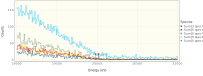

In [3]:
set_default_plot_size(8inch,3inch)
plot(al2o3, sio2, fe, mgo, caf2, duanehunt=true, xmin=19.0e3, xmax=21.0e3)

In [4]:
q20 = map(s->quantify(s, refs20), unk20)
# show(NeXLMatrixCorrection.describe(q20))
m20 = mean(material.(q20))
asa(DataFrame, q20, nominal = srm470_k412)

,Material,O,Mg,Al,Si,Ca,Fe,Total
,String,Abstrac…,Abstrac…,Abstrac…,Abstrac…,Abstrac…,Abstrac…,Abstrac…
1,IIIE K412[0][all],0.432871,0.114286,0.048343,0.206737,0.10819,0.081608,0.992034
2,IIIE K412[1][all],0.436753,0.114627,0.0484106,0.206428,0.107683,0.0808213,0.994723
3,IIIE K412[2][all],0.439648,0.115205,0.0484361,0.207545,0.108689,0.0823124,1.00184
4,IIIE K412[3][all],0.443775,0.114972,0.0485201,0.207088,0.107596,0.0805914,1.00254
5,IIIE K412[4][all],0.447707,0.115442,0.0484473,0.206751,0.107362,0.0801303,1.00584
6,SRM-470 K412,0.427576,0.116568,0.0490621,0.211983,0.108991,0.0774201,0.9916
